데이터 탐색
==

다루는 내용
--
- 데이터 특성 보기, 데이터 탐색, 시각화
- 클러스터링

데이터
--
- 전력거래소에서 미리 데이터를 다운받아 data 디렉토리에 저장해야 한다.
- 전력판매량(시도별/용도별) excel https://goo.gl/Cx8Rzw

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

데이터 읽기
--

In [2]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [3]:
power_data.head(5)
# power_data[:5]

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [4]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [5]:
power_data.set_index('구분')

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358


In [6]:
power_data[:5]

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [7]:
power1 = power_data.set_index('구분')

In [8]:
power1.head(5)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


데이터 특성 보기
--
- boxplot
- barplot
- hist0gram

박스플롯
--

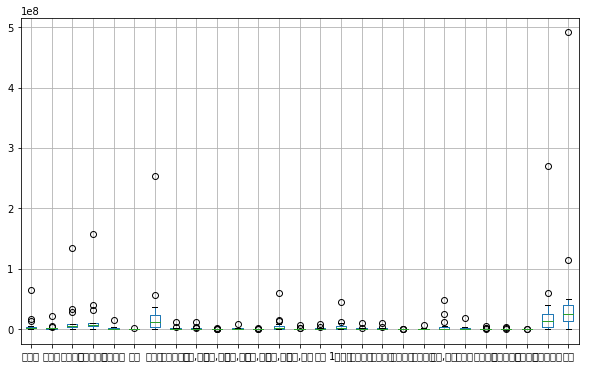

In [9]:
power1.boxplot(figsize=(10,6))

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [10]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
elif platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print("Error...")

In [11]:
# 윈도우에서는 아래로 폰트 확인
#--------------------------------
# !dir c:\Windows\Fonts\m* 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 27 Text xticklabel objects>)

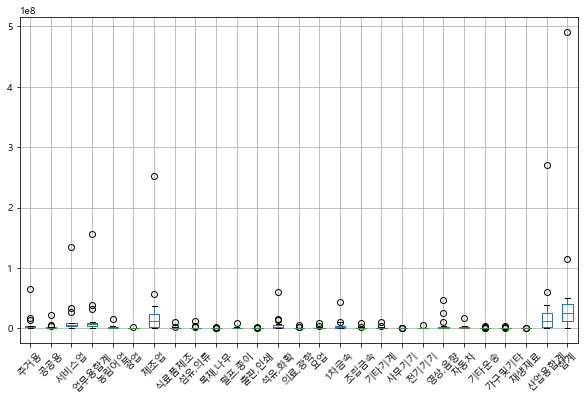

In [12]:
power1.boxplot(figsize=(10,6))
plt.xticks(rotation=45)

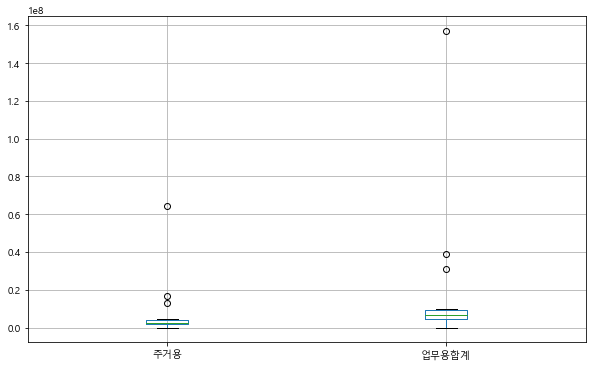

In [13]:
power1[['주거용', '업무용합계']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

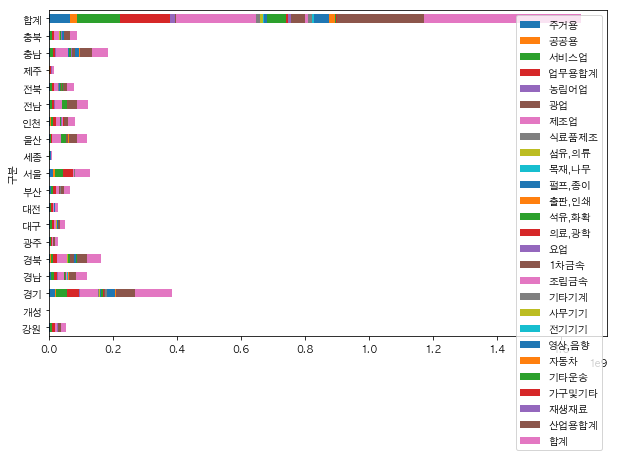

In [14]:
power1.plot(kind='barh', figsize=(10,6), stacked=True)

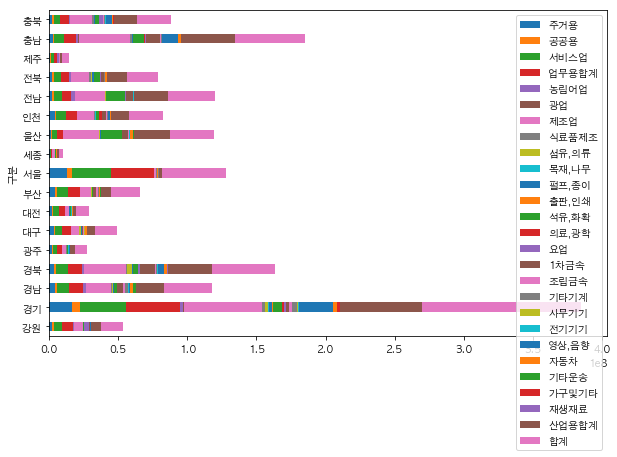

In [15]:
power2 = power1.drop(['합계', '개성'])
power2.plot(kind='barh', figsize=(10,6), stacked=True)

In [16]:
see = ['주거용', '공공용', '서비스업',  '농림어업', '제조업', '석유,화확', '1차금속', '영상,음향']

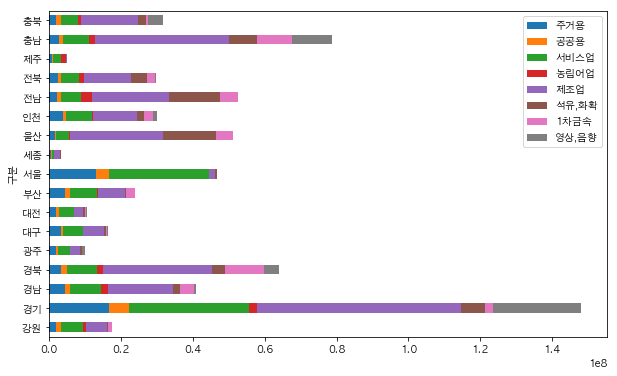

In [17]:
power2[see].plot(kind='barh', figsize=(10,6), stacked=True)

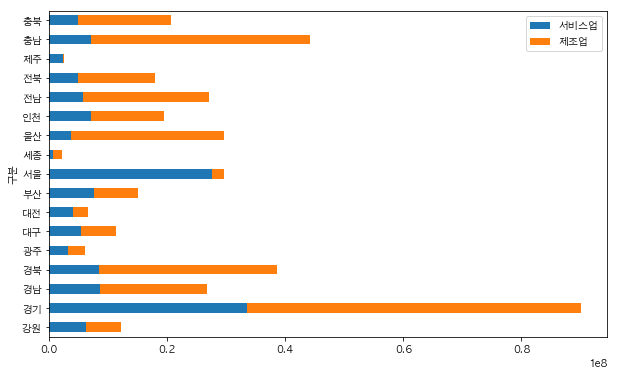

In [18]:
see2 = [ '서비스업','제조업']
power2[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [19]:
power = power2[see2]
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
서울,27647345,1918893


히스토그램
--

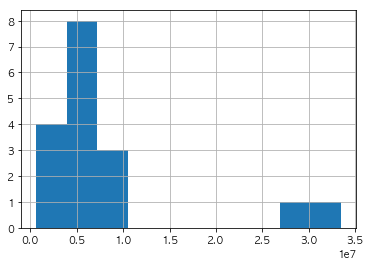

In [20]:
power['서비스업'].hist()

스캐터 플롯
--

In [21]:
print(power.shape)
n_samples = power.shape[0]
print(n_samples)

(17, 2)
17


Text(0,0.5,'제조업')

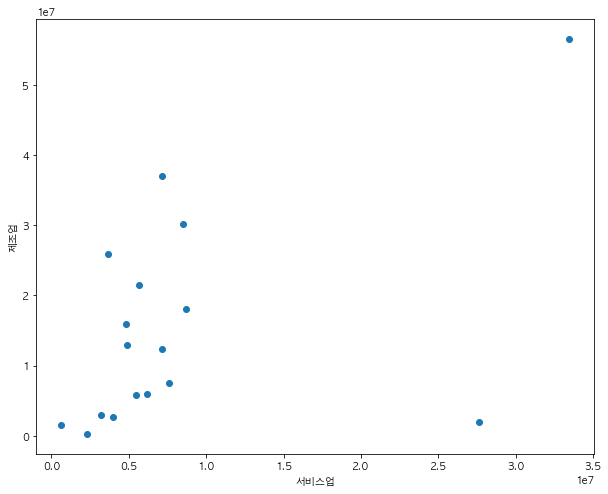

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

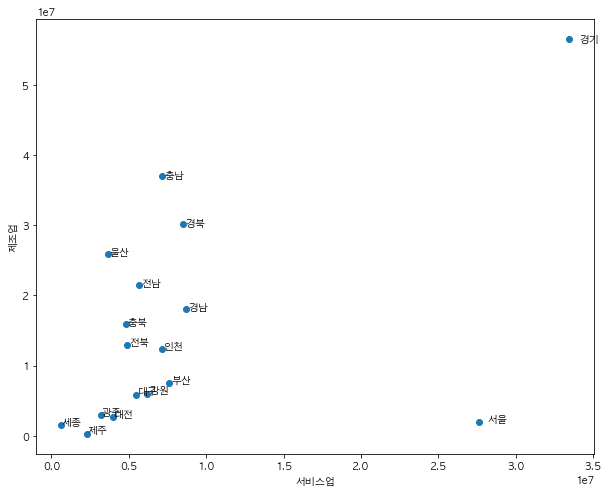

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
        plt.text(power['서비스업'][n]*1.02, power['제조업'][n]*0.99, power2.index[n])

In [24]:
power = power.drop(['경기', '서울'])
n_samples = power.shape[0]

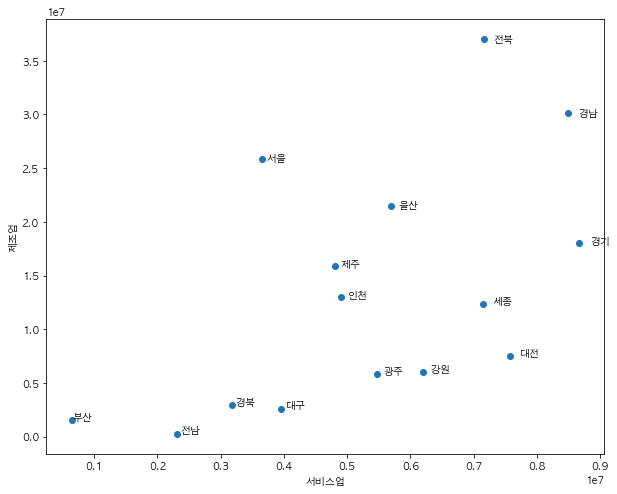

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
        plt.text(power['서비스업'][n]*1.02, power['제조업'][n]*0.99, power2.index[n])

덴드로그램
--


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn.cluster import KMeans

Z = linkage(power, metric='euclidean', method='ward') # 유클리드 거리를 이용해 Linkage Matrix를 생성
Z

array([[0.00000000e+00, 4.00000000e+00, 7.46490444e+05, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 8.37460840e+05, 2.00000000e+00],
       [7.00000000e+00, 1.20000000e+01, 2.08750703e+06, 2.00000000e+00],
       [9.00000000e+00, 1.10000000e+01, 2.32242339e+06, 2.00000000e+00],
       [6.00000000e+00, 1.50000000e+01, 2.71835602e+06, 3.00000000e+00],
       [1.40000000e+01, 1.80000000e+01, 3.97556707e+06, 3.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 3.98077493e+06, 4.00000000e+00],
       [1.00000000e+00, 1.00000000e+01, 4.51929196e+06, 2.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 6.42807846e+06, 2.00000000e+00],
       [2.00000000e+01, 2.20000000e+01, 9.62487446e+06, 5.00000000e+00],
       [1.30000000e+01, 2.30000000e+01, 1.05362448e+07, 3.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.12250792e+07, 7.00000000e+00],
       [2.40000000e+01, 2.50000000e+01, 2.88055419e+07, 8.00000000e+00],
       [2.60000000e+01, 2.70000000e+01, 4.93010586e

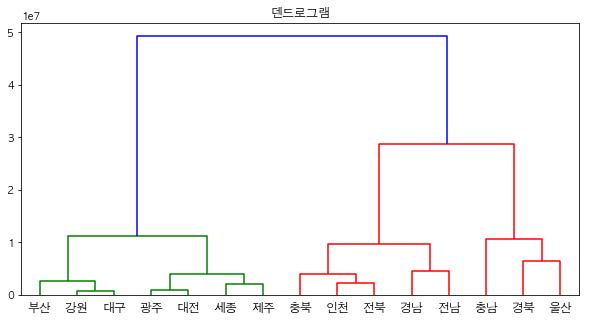

In [27]:
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

클러스터링 (KMeans)
--

In [28]:
k = KMeans(n_clusters= 4).fit(power)
k.labels_

array([1, 3, 0, 1, 1, 1, 1, 1, 2, 3, 2, 3, 1, 0, 3], dtype=int32)

In [29]:
my_markers=['*', 'o', '^', 'v']
my_color =['r','b','g','k']

<Figure size 432x288 with 0 Axes>

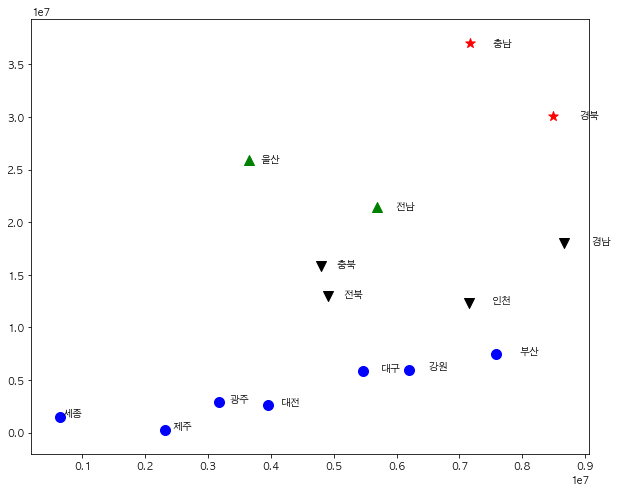

In [30]:
n_samples = power.shape[0]

plt.clf()
plt.figure(figsize=(10, 8))
for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])

In [31]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


스케일링 (표준 정규화)
--

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


정규화 이후의 클러스터링
--

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [73.75, 73.75, 121.25, 121.25],
  [50.0, 50.0, 97.5, 97.5],
  [13.75, 13.75, 73.75, 73.75]],
 'dcoord': [[0.0, 0.35112173451673884, 0.35112173451673884, 0.0],
  [0.0, 0.7031395851260076, 0.7031395851260076, 0.35112173451673884],
  [0.0, 1.3737404620404814, 1.3737404620404814, 0.7031395851260076],
  [0.0, 0.8709770048417126, 0.8709770048417126, 0.0],
  [0.0, 0.27226463916122934, 0.27226463916122934, 0.0],
  [0.0, 0.861560932122164, 0.861560932122164, 0.27226463916122934],
  [0.0, 1.3106280151191987, 1.3106280151191987, 0.861560932122164],
  [0.0, 0.3289197431202892, 0.3289197431202892, 0.0],
  [0.0, 0.48562171500898477, 0.48562171500898477, 0.0],
  [0.0, 1.09

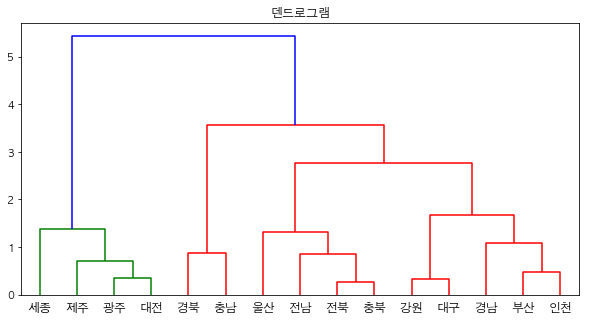

In [33]:
Z = linkage(power, metric='euclidean', method='ward') # 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)

In [34]:
k = KMeans(n_clusters= 4).fit(power)

<Figure size 432x288 with 0 Axes>

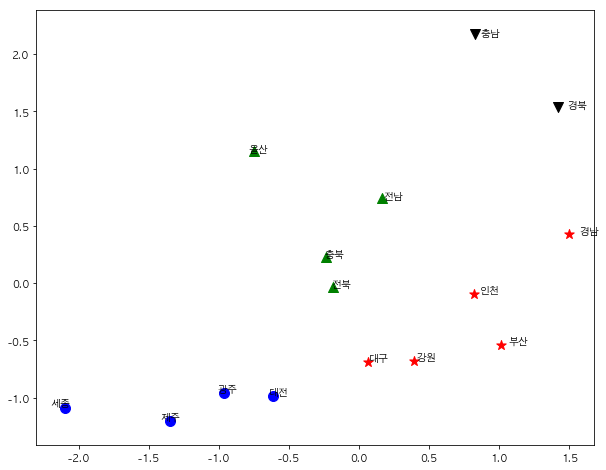

In [35]:
plt.clf()
plt.figure(figsize=(10, 8))
for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])